In [ ]:
#importación de las liberías a utilizar:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Lectura de los datos desde git y creación del Dataframe:
url='https://github.com/pentahogmail123/lic/files/12886844/1920-2021.csv'
df=pd.read_csv(url, encoding = "ISO-8859-1",sep=',')

In [ ]:
#Inspeccionamos el dataframe
df

anio    nombre sexo   n  proporcion
0       1920     Aaron    M   1    0.000049
1       1920  Abdolina    F   1    0.000049
2       1920     Abdon    M   1    0.000049
3       1920    AbdÃ³n    M   2    0.000098
4       1920      Abel    M  11    0.000540
...      ...       ...  ...  ..         ...
858777  2021     Zuria    F   2    0.000011
858778  2021    Zurick    F   1    0.000006
858779  2021      Zury    F   1    0.000006
858780  2021      Zyan    M   2    0.000011
858781  2021    Zyhara    F   1    0.000006

[858782 rows x 5 columns]

In [ ]:
#Agrupamos por sexo, para ver a priori las cantidades de datos, por sexo
df.groupby('sexo')['n'].sum()

sexo
F    10931372
I         344
M    11197384
Name: n, dtype: int64

In [ ]:
#Preparamos los datos para graficar con la libreria matplotlib
total_pivot = df.pivot_table('n', index='anio',columns='sexo', aggfunc=sum)
total_pivot.head()
total_nac=total_pivot.rename_axis(columns = None).reset_index()

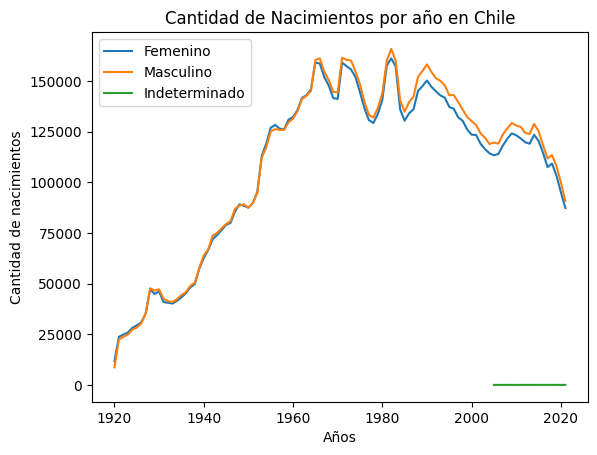

In [ ]:
#graficamos con la libreria matplotlib
anio = pd.Series(total_nac['anio'])
fem = pd.Series(total_nac['F'])
masc = pd.Series(total_nac['M'])
indet = pd.Series(total_nac['I'])
fig, ax = plt.subplots()
plt.title('Cantidad de Nacimientos por año en Chile')
ax.plot(anio, fem, label=	'Femenino')
ax.plot(anio, masc, label='Masculino')
ax.plot(anio, indet, label='Indeterminado')
ax.legend()
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de nacimientos'	)
plt.show()

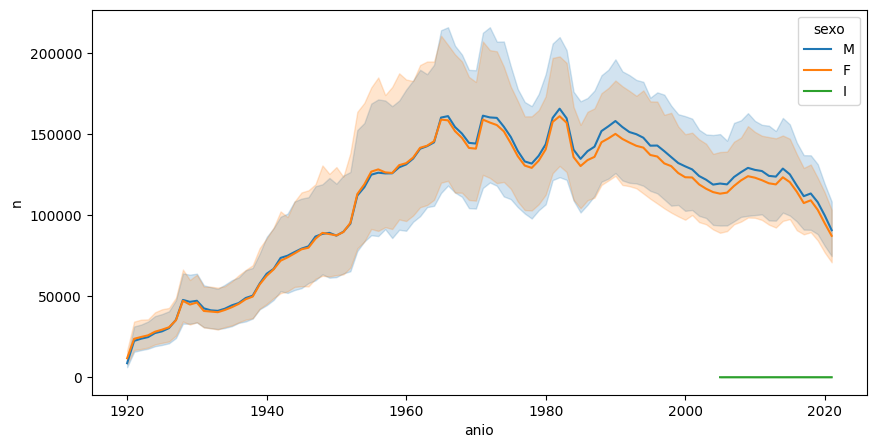

In [ ]:
#Graficamos con seaborn
plt.figure(figsize=(10,5))
sns.lineplot(x='anio',y='n', hue="sexo", data=df, estimator=sum)
plt.show()

**Conclusión**: Con ambos métodos obtenemos similar resultado. Nos damos cuenta que la tendencia de natalidad de los últimos años ha ido considerablemente a la baja.

 **• Determinar los nombres más utilizados cada año o los nombres cuya popularidad ha
aumentado o disminuido más.**


In [ ]:
def get_top1000(group):
  return group.sort_values('n', ascending=False)[:1000]

grouped = df.groupby(['anio', 'sexo'])
top1000 = grouped.apply(get_top1000)
top1000=top1000.reset_index(drop=True)
#top1000.tail(10)

In [ ]:
niños = top1000[top1000['sexo'] == 'M']
niñas = top1000[top1000['sexo'] == 'F']


array([<Axes: xlabel='anio'>, <Axes: xlabel='anio'>,
       <Axes: xlabel='anio'>], dtype=object)

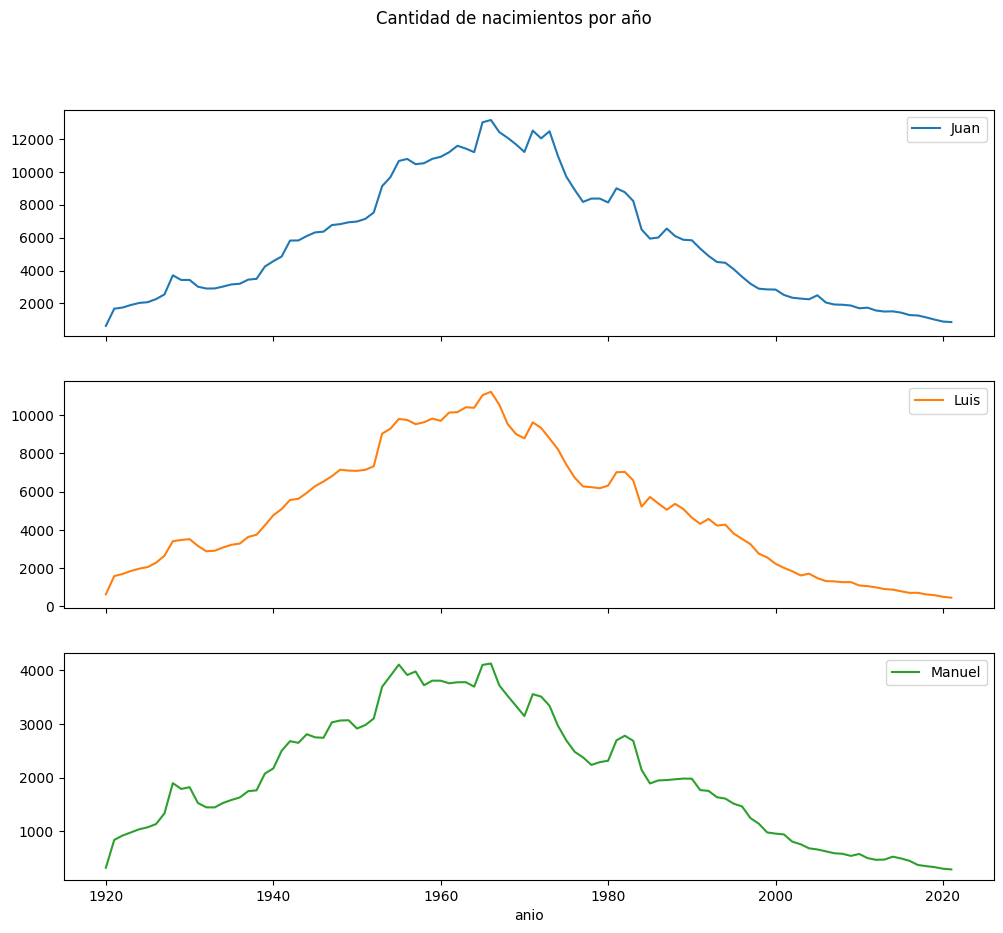

In [ ]:
total_pivot2 = top1000.pivot_table('n', index='anio',columns='nombre', aggfunc=sum)
subconjunto = total_pivot2[['Juan', 'Luis', 'Manuel']]

subconjunto.plot(subplots=True, figsize=(12, 10),title='Cantidad de nacimientos por año')

**Medición del aumento de la diversidad en los nombres**

<Axes: title={'center': 'Suma de proporciones por año y por sexo'}, xlabel='anio'>

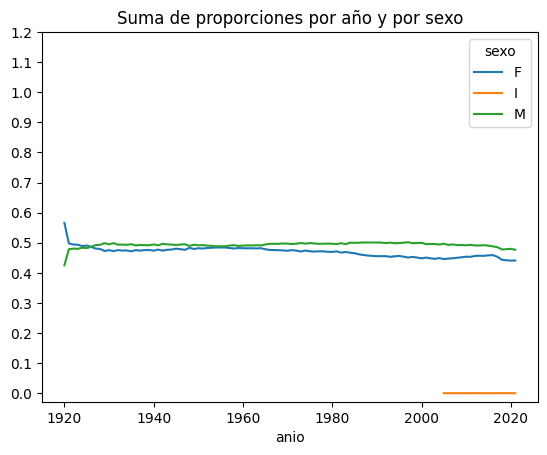

In [ ]:
table= top1000.pivot_table('proporcion', index='anio',columns='sexo', aggfunc=sum)

table.plot(title='Suma de proporciones por año y por sexo',yticks=np.linspace(0, 1.2, 13))


<font color='red'>__ATENCIÓN:__:<br>
Indicamos los caso de uso con el nombre del alumno.</font>

#<font color='blue'>**Caso de uso: Jorge Hueichán Rumián**</font>
##Análisis de datos - Supermercado
1. Introducción
Se ha llevado a cabo una minuciosa preparación de datos al unir dos bases de datos, lo que incluyó la limpieza, renombrado de columnas y eliminación de valores nulos insignificantes. También enriquecimos los datos con información de fechas para análisis temporales. No se encontraron duplicados en nuestros registros. Se analizó que categoría de vegetales era la que generaba mayor impacto en la ventas. Exploramos la distribución de pesos por unidad y ventas por kilos, y aunque encontramos valores extremos, determinamos que no impactaban significativamente en nuestro análisis. Además, evaluamos la relación entre descuentos y ventas, permitiéndonos comprender su influencia en el comportamiento de compra normalizado.

En resumen, nuestra preparación y análisis de datos meticulosos nos brindaron una visión más clara de nuestro conjunto de datos, asegurando que los resultados sean sólidos y confiables para la toma de decisiones basadas en datos.
***


**1.- Importación librerías y carga de datos:**

In [ ]:
#Importando las librerias
import pandas as pd # manejo de base de datos
import numpy as np # manejo de base de datos
import matplotlib.pyplot as plt # Visualizaciones
import seaborn as sns # Visualizaciones

In [ ]:
url_01='https://gitlab.com/andrumaker/diplomado/-/raw/main/annex1.csv'
url_02='https://gitlab.com/andrumaker/diplomado/-/raw/main/annex2.csv'

archivo_01=pd.read_csv(url_01)
archivo_02=pd.read_csv(url_02)

**2.- Exploración y limpieza de datos:**

In [ ]:
archivo_01

Item Code                                     Item Name  \
0    102900005115168                              Niushou Shengcai   
1    102900005115199                             Sichuan Red Cedar   
2    102900005115625                         Local Xiaomao Cabbage   
3    102900005115748                                  White Caitai   
4    102900005115762                                      Amaranth   
..               ...                                           ...   
246  106958851400125                    Haixian Mushroom (Bag) (4)   
247  106971533450003                      Haixian Mushroom (Bunch)   
248  106971533455008                    Haixian Mushroom (Bag) (3)   
249  106973223300667  Chinese Caterpillar Fungus Flowers (Box) (2)   
250  106973990980123                 Hfyg Haixian Mushroom (Bunch)   

     Category Code           Category Name  
0       1011010101  Flower/Leaf Vegetables  
1       1011010101  Flower/Leaf Vegetables  
2       1011010101  Flower/Leaf Vegetables  
3       1011010101  Flower/Leaf Vegetables  
4       1011010101  Flower/Leaf Vegetables  
..             ...                     ...  
246     1011010801         Edible Mushroom  
247     1011010801         Edible Mushroom  
248     1011010801         Edible Mushroom  
249     1011010801         Edible Mushroom  
250     1011010801         Edible Mushroom  

[251 rows x 4 columns]

In [ ]:
archivo_02

Date          Time        Item Code  Quantity Sold (kilo)  \
0       2020-07-01  09:15:07.924  102900005117056                 0.396   
1       2020-07-01  09:17:27.295  102900005115960                 0.849   
2       2020-07-01  09:17:33.905  102900005117056                 0.409   
3       2020-07-01  09:19:45.450  102900005115823                 0.421   
4       2020-07-01  09:20:23.686  102900005115908                 0.539   
...            ...           ...              ...                   ...   
878498  2023-06-30  21:35:13.264  102900005115250                 0.284   
878499  2023-06-30  21:35:14.358  102900011022764                 0.669   
878500  2023-06-30  21:35:20.264  102900005115250                 0.125   
878501  2023-06-30  21:35:21.509  102900011016701                 0.252   
878502  2023-06-30  21:40:48.248  102900011022764                 0.803   

        Unit Selling Price (RMB/kg) Sale or Return Discount (Yes/No)  
0                               7.6           sale                No  
1                               3.2           sale                No  
2                               7.6           sale                No  
3                              10.0           sale                No  
4                               8.0           sale                No  
...                             ...            ...               ...  
878498                         24.0           sale                No  
878499                         12.0           sale                No  
878500                         24.0           sale                No  
878501                          5.2           sale                No  
878502                         12.0           sale                No  

[878503 rows x 7 columns]

In [ ]:
#Revisando las categorías dentro de la columna 'Category Name'
archivo_01['Category Name'].unique()

array(['Flower/Leaf\xa0Vegetables', 'Cabbage',
       'Aquatic Tuberous Vegetables', 'Solanum', 'Capsicum',
       'Edible Mushroom'], dtype=object)

In [ ]:
#Se uniran lo dataframes en base a la colunmna 'item code'
super= pd.merge(archivo_01, archivo_02, on="Item Code", how="left")

In [ ]:
super.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878508 entries, 0 to 878507
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Code                    878508 non-null  int64  
 1   Item Name                    878508 non-null  object 
 2   Category Code                878508 non-null  int64  
 3   Category Name                878508 non-null  object 
 4   Date                         878503 non-null  object 
 5   Time                         878503 non-null  object 
 6   Quantity Sold (kilo)         878503 non-null  float64
 7   Unit Selling Price (RMB/kg)  878503 non-null  float64
 8   Sale or Return               878503 non-null  object 
 9   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 73.7+ MB


In [ ]:
# finalas, columnas
super.shape

(878508, 10)

In [ ]:
#Revisando los Na dentro del df(valores nulos)
super.isna().sum(axis=0)

Item Code                      0
Item Name                      0
Category Code                  0
Category Name                  0
Date                           5
Time                           5
Quantity Sold (kilo)           5
Unit Selling Price (RMB/kg)    5
Sale or Return                 5
Discount (Yes/No)              5
dtype: int64

In [ ]:
#Eliminando filas con Na
super = super.dropna().reset_index(drop=True)

In [ ]:
#finasl, colunmnas luego de borrar los Na
super.shape

(878503, 10)

In [ ]:
nombres_nuevos = {
    'Category Name': 'Category_Name',
    'Quantity Sold (kilo)': 'Sold_Kg',
    'Unit Selling Price (RMB/kg)' : 'Unit_Selling_Price',
    'Sale or Return': 'Sale_or_Return',
}
super.rename(columns=nombres_nuevos, inplace=True)

In [ ]:
#Inspeccionando las primeraas 10 filas del dataframe, al unir las dos bases de datos
super.head(10)

Item Code         Item Name  Category Code           Category_Name  \
0  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
1  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
2  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
3  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
4  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
5  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
6  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
7  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
8  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   
9  102900005115168  Niushou Shengcai     1011010101  Flower/Leaf Vegetables   

         Date          Time  Sold_Kg  Unit_Selling_Price Sale_or_Return  \
0  2020-10-30  10:02:13.748    0.743                 5.0           sale   
1  2020-10-30  10:48:42.707    0.502                 5.0           sale   
2  2020-10-30  11:10:13.023    0.301                 5.0           sale   
3  2020-10-30  12:34:32.084    0.382                 5.0           sale   
4  2020-10-30  13:33:59.748    0.261                 5.0           sale   
5  2020-10-30  14:12:31.545    0.341                 5.0           sale   
6  2020-10-30  15:19:36.276    0.221                 5.0           sale   
7  2020-10-30  16:06:13.967    0.321                 5.0           sale   
8  2020-10-30  16:25:55.743    0.462                 5.0           sale   
9  2020-10-30  16:32:46.264    0.422                 5.0           sale   

  Discount (Yes/No)  
0                No  
1                No  
2                No  
3                No  
4                No  
5                No  
6                No  
7                No  
8                No  
9                No

In [ ]:
#generando estadísticas descriptivas del DataFrame.
super.describe().T

count          mean           std           min  \
Item Code           878503.0  1.030313e+14  7.174368e+11  1.029000e+14   
Category Code       878503.0  1.011010e+09  2.582929e+02  1.011010e+09   
Sold_Kg             878503.0  5.361119e-01  4.000875e-01 -9.082000e+00   
Unit_Selling_Price  878503.0  8.917144e+00  6.311265e+00  1.000000e-01   

                             25%           50%           75%           max  
Item Code           1.029000e+14  1.029000e+14  1.029000e+14  1.069740e+14  
Category Code       1.011010e+09  1.011010e+09  1.011011e+09  1.011011e+09  
Sold_Kg             2.900000e-01  4.350000e-01  7.420000e-01  1.600000e+02  
Unit_Selling_Price  4.900000e+00  7.900000e+00  1.080000e+01  1.199000e+02

**Nota:** Podemos observar que el menor precio unitario de venta es de 0.1 RMB/kg, el máximo es de 119.9 RMB/kg, muy por encima de la media. Además, en Quatity sold(cantidad vendida) el mínimo es un número negativo, por ende, se necesita verificar.

In [ ]:
#Verificación de duplicados.
duplicated = super.duplicated()
duplicated.value_counts()

False    878503
dtype: int64

In [ ]:
#Crear 3 nuevas columnas para agregar mes, día y año.
super['Date'] = pd.to_datetime(super['Date'])
super['Day'] =  super['Date'].dt.day_name()
super['Month'] = super['Date'].dt.strftime('%b')
super['Year'] = super['Date'].dt.year

In [ ]:
print(super['Year'].unique())

[2020 2021 2022 2023]


**Nota**: Se cuenta con datos del año 2020 al 2023


In [ ]:
min_qsold = super[super['Sold_Kg'] < 0]
min_qsold['Sale_or_Return'].value_counts()

return    461
Name: Sale_or_Return, dtype: int64

**Nota**: Se puede confirmar que todos los valores negativos representan a las devoluciones.

In [ ]:
sold = super[super['Sold_Kg'] > 0]
sold['Sale_or_Return'].value_counts()

sale    878042
Name: Sale_or_Return, dtype: int64

In [ ]:
sales = super['Sale_or_Return'].value_counts().reset_index()
sales

index  Sale_or_Return
0    sale          878042
1  return             461

**3.- Visualizaciones**

In [ ]:
# Distribución de cantidad de ventas por categoría.
category = super['Category_Name'].value_counts(normalize=True).reset_index()
category = category.rename(columns={"index": "Category_Name","Category_Name": "proportion"})

category

Category_Name  proportion
0       Flower/Leaf Vegetables    0.377879
1                     Capsicum    0.236762
2              Edible Mushroom    0.168951
3                      Cabbage    0.098543
4  Aquatic Tuberous Vegetables    0.066758
5                      Solanum    0.051107

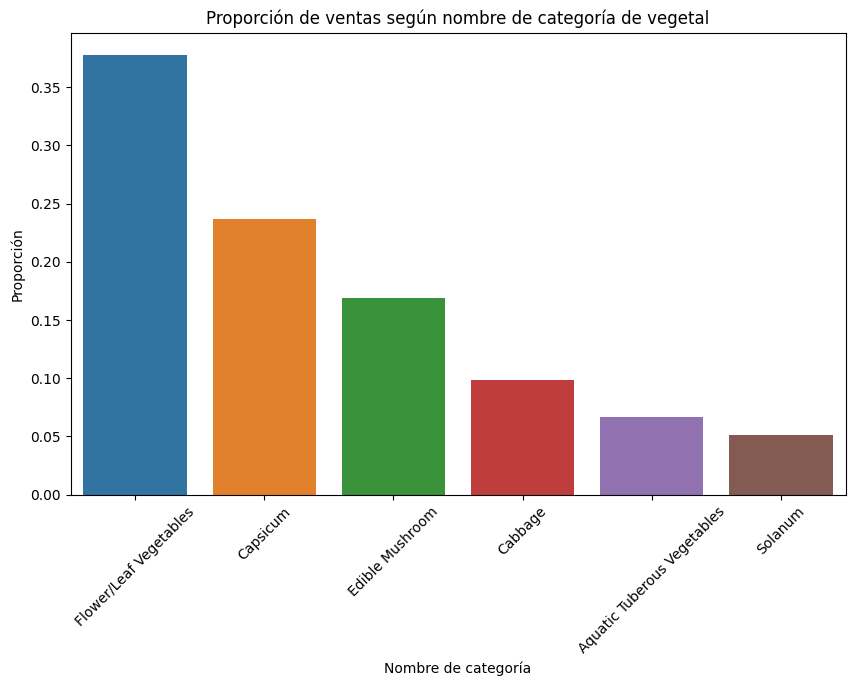

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=category, x='Category_Name', y='proportion')
plt.ylabel('Proporción')
plt.xlabel('Nombre de categoría')
plt.title('Proporción de ventas según nombre de categoría de vegetal')
plt.xticks(rotation = 45)
plt.show()

**Nota:** En cantidades los vegateles que más se venden corresponden a Leaf Vegetables, Capsicum y Edible Mushroom, que corresponden a Verduras de hojas, pimientos o ajís y champiñones comestibles.

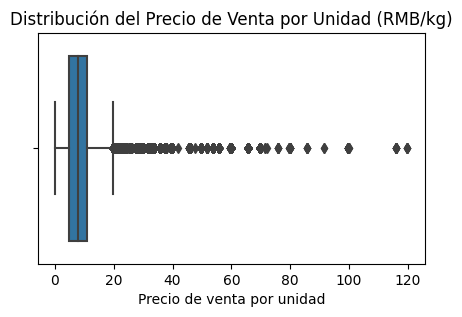

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(data=super, x='Unit_Selling_Price')
plt.xlabel('Precio de venta por unidad')
plt.title('Distribución del Precio de Venta por Unidad (RMB/kg)');

**Nota:**  Lo anterior se hizo para entender un poco mejor la distribución de precios y revisar los valores atípicos dentro de la base de datos.

In [ ]:
max_usp = super[super['Unit_Selling_Price'] > 20]
valores_unicos = max_usp[['Item Name', 'Unit_Selling_Price']]
valores_unicos

Item Name  Unit_Selling_Price
2087                     Sichuan Red Cedar                25.6
2088                     Sichuan Red Cedar                25.6
2089                     Sichuan Red Cedar                49.8
2090                     Sichuan Red Cedar                49.8
2091                     Sichuan Red Cedar                49.8
...                                    ...                 ...
850139  Chinese Caterpillar Fungus Flowers                25.6
850141  Chinese Caterpillar Fungus Flowers                25.6
850142  Chinese Caterpillar Fungus Flowers                25.6
850147      The Crab Flavor Mushroom (Bag)               100.0
850148      The Crab Flavor Mushroom (Bag)               100.0

[37178 rows x 2 columns]

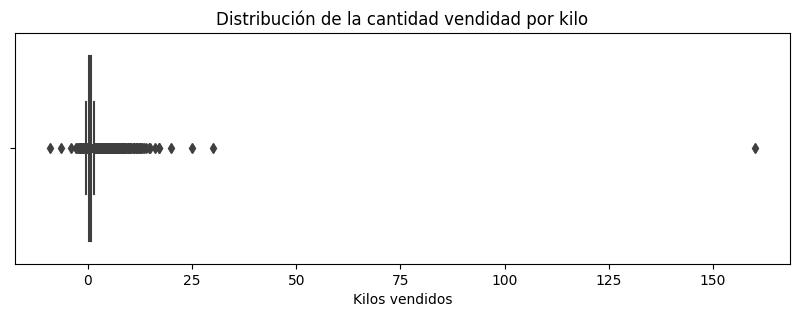

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(data=super, x='Sold_Kg')
plt.xlabel('Kilos vendidos')
plt.title('Distribución de la cantidad vendidad por kilo');

**Nota:** Como se puede observar, ese valor aislado sobre 150 kilos se puede asumir como un valor atípico, dependiendo de los análisis que se realicen, se verá su tratamiento.

In [ ]:
# Valor aíslado en kilos vendidos
outlier_kilos = super[super['Sold_Kg'] > 50]
outlier_kilos

Item Code             Item Name  Category Code  \
316340  102900011034354  Xianzongye (Bag) (1)     1011010101   

                 Category_Name       Date          Time  Sold_Kg  \
316340  Flower/Leaf Vegetables 2022-06-09  09:31:57.045    160.0   

        Unit_Selling_Price Sale_or_Return Discount (Yes/No)       Day Month  \
316340                 5.9           sale                No  Thursday   Jun   

        Year  
316340  2022

In [ ]:
# Agrupa los datos por "Tipo de Vegetal" y "Año", y suma la cantidad vendida

df_agrupado = super.groupby(['Category_Name', 'Year'])['Sold_Kg'].sum().unstack()

df_agrupado

Year                              2020       2021       2022       2023
Category_Name                                                          
Aquatic Tuberous Vegetables   6199.134  13102.657  15754.053   5525.509
Cabbage                       9431.229  12688.204  14158.126   5488.892
Capsicum                     12186.894  23237.817  34679.850  21484.068
Edible Mushroom              14654.347  21920.999  23345.937  16165.442
Flower/Leaf Vegetables       39322.408  58681.699  67105.174  33411.697
Solanum                       4789.987   7795.673   6258.665   3587.457

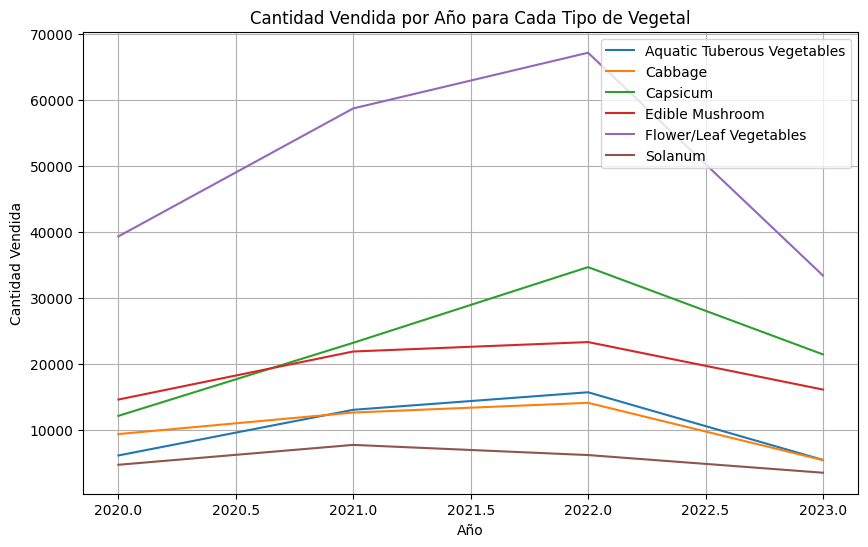

In [ ]:
plt.figure(figsize=(10, 6))
for Category_Name in df_agrupado.index:
    plt.plot(df_agrupado.columns, df_agrupado.loc[Category_Name], label=Category_Name)

plt.xlabel("Año")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad Vendida por Año para Cada Tipo de Vegetal")
plt.legend()
plt.grid(True)
plt.show();

**Nota:**Se puede observar un comportamiento similar para la venta de todos los tipos de vegetales, casi todos tuvieron su peek de ventas en año 2022 exceptuando por el solanum, cual tuvo su peek en el 2021.

In [ ]:
# Agrupa los datos por "Tipo de Vegetal" y "Día", y suma la cantidad vendida

orden_dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Configura la columna 'Day' como categórica con el orden personalizado
super['Day'] = pd.Categorical(super['Day'], categories=orden_dias_semana, ordered=True)

# Agrupa los datos y suma la cantidad vendida por día
df_agrupado1 = super.groupby(['Category_Name', 'Day'])['Sold_Kg'].sum().unstack()
df_agrupado1

Day                             Monday    Tuesday  Wednesday   Thursday  \
Category_Name                                                             
Aquatic Tuberous Vegetables   5057.837   4984.419   4897.601   4735.597   
Cabbage                       5351.757   5177.457   5249.379   5109.828   
Capsicum                     11616.194  11358.231  11329.054  11376.806   
Edible Mushroom               9428.173   8927.815   9692.851   9472.502   
Flower/Leaf Vegetables       26054.213  25049.422  25415.360  24857.889   
Solanum                       2943.363   2762.496   2776.967   2770.651   

Day                             Friday   Saturday     Sunday  
Category_Name                                                 
Aquatic Tuberous Vegetables   5803.520   7758.294   7344.085  
Cabbage                       5830.657   7502.662   7544.711  
Capsicum                     13295.184  16624.734  15988.426  
Edible Mushroom              10975.330  14109.779  13480.275  
Flower/Leaf Vegetables       27108.944  35738.157  34296.993  
Solanum                       3136.206   3997.029   4045.070

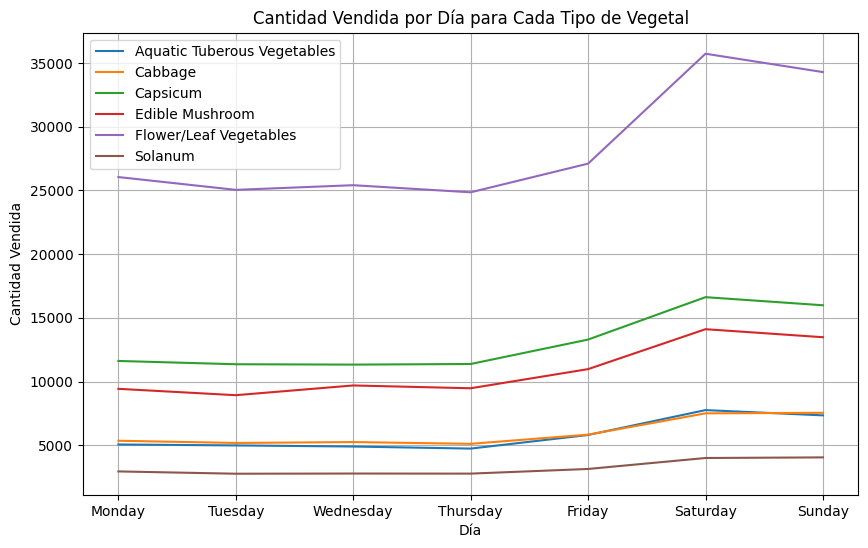

In [ ]:
plt.figure(figsize=(10, 6))
for Category_Name in df_agrupado.index:
    plt.plot(df_agrupado1.columns, df_agrupado1.loc[Category_Name], label=Category_Name)

plt.xlabel("Día")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad Vendida por Día para Cada Tipo de Vegetal")
plt.legend()
plt.grid(True)
plt.show();

**Nota:**Se puede observar una clara tendencia a que la mayor cantidad de ventas para todas los tipos de vegetales de concentra en el fin de semana.

In [ ]:
# Agrupa los datos y suma la cantidad vendida por mes
orden_meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"]
super['Month'] = pd.Categorical(super['Month'], categories=orden_meses, ordered=True)
df_agrupado2 = super.groupby(['Category_Name', 'Month'])['Sold_Kg'].sum().unstack()
df_agrupado2

Month                              Jan        Feb        Mar        Apr  \
Category_Name                                                             
Aquatic Tuberous Vegetables   6090.239   4060.735   2514.772   1393.406   
Cabbage                       4103.314   3437.034   2577.573   2532.744   
Capsicum                     10199.422   9683.630   8905.972   7390.322   
Edible Mushroom               9824.462   7590.650   5728.022   4684.213   
Flower/Leaf Vegetables       17854.468  14562.931  13896.442  13546.647   
Solanum                       1798.696   1850.245   1556.754   1828.698   

Month                              May        Jun        Jul        Aug  \
Category_Name                                                             
Aquatic Tuberous Vegetables    886.781   1198.250   2740.337   4507.099   
Cabbage                       2704.914   2495.009   4468.896   4926.435   
Capsicum                      6617.021   5940.229   6136.829   9886.534   
Edible Mushroom               4054.720   3910.553   4513.228   5296.752   
Flower/Leaf Vegetables       14103.027  13293.557  17372.308  24505.931   
Solanum                       2477.506   2567.795   2900.921   2736.189   

Month                              Sep        Oct        Nov        Dec  
Category_Name                                                            
Aquatic Tuberous Vegetables   3769.691   4934.592   3586.951   4898.500  
Cabbage                       3588.391   3905.322   3881.497   3145.322  
Capsicum                      6753.804   7933.539   6159.931   5981.396  
Edible Mushroom               5057.725   8538.774   8156.810   8730.816  
Flower/Leaf Vegetables       18724.265  19212.186  14931.902  16517.314  
Solanum                       1517.570   1400.631    936.316    860.461

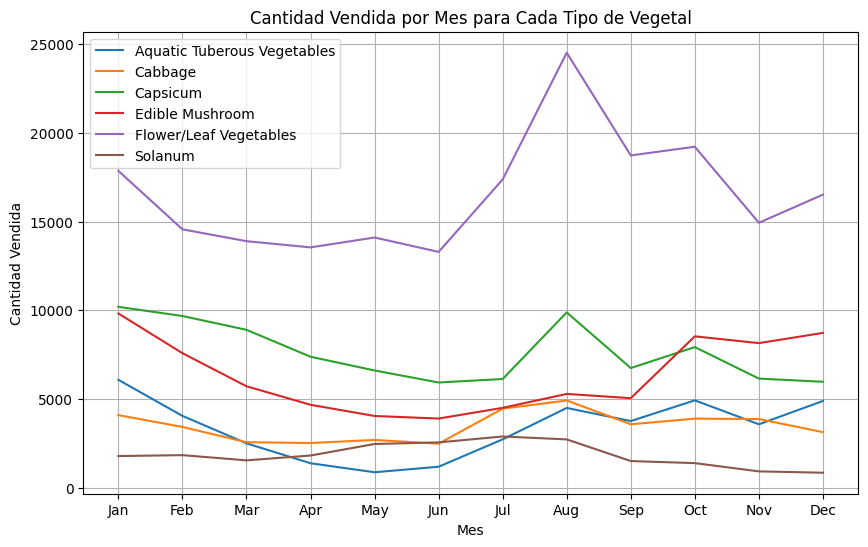

In [ ]:
plt.figure(figsize=(10, 6))
for Category_Name in df_agrupado.index:
    plt.plot(df_agrupado2.columns, df_agrupado2.loc[Category_Name], label=Category_Name)

plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad Vendida por Mes para Cada Tipo de Vegetal")
plt.legend()
plt.grid(True)
plt.show();

**Nota:**Se puede observar un aumento relativo para las dos categorías más vendidas para el mes agosto. Luego de revisar los 3 gráficos, se puede determinar que el outlier encontrado, no genera un cambio significativo en los datos, aún extrayendolo el comportamiento de los datos permenecera similar.

In [ ]:
# Agrupa los datos por 'Product' y 'Discount' y suma la cantidad de kilos vendidos
df_agrupado3 = super.groupby(['Category_Name', 'Discount (Yes/No)'])['Sold_Kg'].sum().unstack()
df_agrupado3

Discount (Yes/No)                    No        Yes
Category_Name                                     
Aquatic Tuberous Vegetables   36931.704   3649.649
Cabbage                       39528.329   2238.122
Capsicum                      86080.302   5508.327
Edible Mushroom               69737.580   6349.145
Flower/Leaf Vegetables       185114.332  13406.646
Solanum                       21831.770    600.012

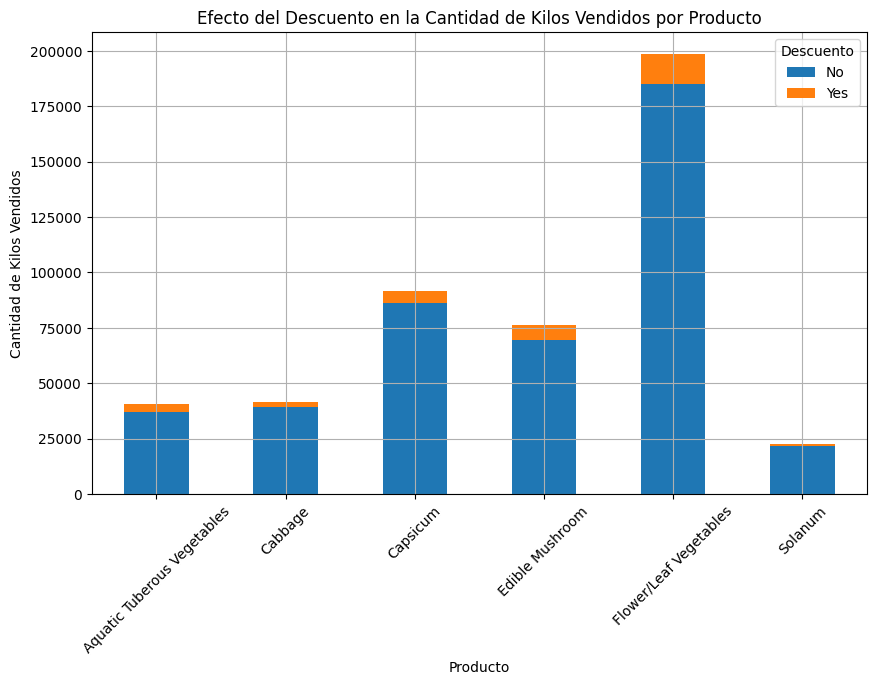

In [ ]:
# Crea un gráfico de barras agrupadas
ax = df_agrupado3.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel("Producto")
plt.ylabel("Cantidad de Kilos Vendidos")
plt.title("Efecto del Descuento en la Cantidad de Kilos Vendidos por Producto")
plt.legend(title="Descuento")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Supongamos que tienes un DataFrame llamado 'df' con las columnas 'Category_Name', 'Discount (Yes/No)' y 'Sold_Kg'

# Agrupa los datos por 'Category_Name' y 'Discount (Yes/No)' y suma la cantidad de kilos vendidos
df_agrupado5 = super.groupby(['Category_Name', 'Discount (Yes/No)'])['Sold_Kg'].sum().unstack()

# Calcula la diferencia porcentual entre 'Yes' (con descuento) y 'No' (sin descuento)
df_agrupado5['Porcentaje de compras con descuentos'] = round((df_agrupado5['Yes'] / (df_agrupado5['No'] + df_agrupado5['Yes'])) * 100 ,2)

df_agrupado5

Discount (Yes/No)                    No        Yes  \
Category_Name                                        
Aquatic Tuberous Vegetables   36931.704   3649.649   
Cabbage                       39528.329   2238.122   
Capsicum                      86080.302   5508.327   
Edible Mushroom               69737.580   6349.145   
Flower/Leaf Vegetables       185114.332  13406.646   
Solanum                       21831.770    600.012   

Discount (Yes/No)            Porcentaje de compras con descuentos  
Category_Name                                                      
Aquatic Tuberous Vegetables                                  8.99  
Cabbage                                                      5.36  
Capsicum                                                     6.01  
Edible Mushroom                                              8.34  
Flower/Leaf Vegetables                                       6.75  
Solanum                                                      2.67

**Nota:**  No se observa una relación directa entre la cantidad compras total y la cantidad de compras con descuento. Es decir, si fuera así 'Flower/Leaf Vegetables' debería tener el mayor poncentaje de compras con descuento.

**4.- Conclusion**  

Se sugieren las siguientes propuestas al supermercado:

Diversificación de Productos: Si bien los vegetales de hojas (Flower/Leaf Vegetables) son populares, sería beneficioso explorar oportunidades para ampliar la variedad de productos en el supermercado. Esto podría atraer a clientes con diferentes preferencias y aumentar las ventas en otras categorías.
Aprovechar el Auge de Ventas en 2022: Dado que se observó un aumento significativo en las ventas en 2022, el supermercado debería analizar las razones detrás de este pico y considerar estrategias para mantener o incluso mejorar ese nivel de ventas en el futuro. Esto podría incluir promociones específicas, ofertas especiales o eventos relacionados con las temporadas de mayor demanda.
Enfoque en Fines de Semana: El hecho de que las ventas alcancen su punto máximo los fines de semana, especialmente los sábados, sugiere que el supermercado podría beneficiarse de estrategias de marketing y promociones dirigidas específicamente a esos días. Esto podría incluir descuentos especiales, eventos de degustación o promociones temáticas para atraer a más clientes durante los fines de semana.
Estacionalidad de Ventas: Aunque no se encontró una correlación clara entre la cantidad vendida y los meses(exceptuando el mes de agosto), el supermercado debe estar atento a las tendencias estacionales y adaptar su inventario y estrategias de marketing en consecuencia. Esto podría incluir la promoción de productos de temporada o la planificación de campañas específicas para ciertos meses.
Refinar Estrategias de Descuento: Dado que no se observa una relación directa entre la cantidad total vendida y la cantidad de ventas con descuento, es importante evaluar con mayor profundidad cómo y cuándo se aplican los descuentos. Esto podría implicar una revisión de las estrategias de precios y promociones para asegurar que sean efectivas y atractivas para los clientes.



---



### **Comprension del negocio**

**INTRODUCCION**

La segmentación de clientes es la práctica de dividir una base de clientes en grupos de individuos que son similares en aspectos específicos relevantes para el marketing, como la edad, el género, los intereses y los hábitos de gasto.

Las empresas que emplean la segmentación de clientes parten del hecho de que cada cliente es diferente, en preferencias y necesidades, y de que los esfuerzos de marketing se verían más favorecidos si se dirigen mensajes a grupos de segmentos específicos.

**ENTORNO DE LA EMPRESA**

Una empresa de consumo tiene previsto entrar en nuevos mercados con sus productos actuales (P1, P2, P3, P4 y P5). Tras un intenso estudio de mercado, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En el mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D ). A continuación, han llevado a cabo una difusión y comunicación segmentada para un segmento diferente de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los clientes potenciales en los nuevos mercados.

**OBJETIVO**

En este proyecto de aprendizaje automático, nuestro objetivo es crear un modelo para predecir adecuadamente la Categorizacion/Clasificacion de los nuevos clientes.

### **Estructura del dataset**

***El conjunto de datos contiene información de clientes en 11 variables, donde 9 variables son caracteristicas demograficas, que permite a la empresa clasificar en segmentos de clientes para fines de marketing.***


- **ID:** Identificación única

- **Gender:** Género del cliente

- **Ever_Married:** Estado civil del cliente

- **Age:** Edad del cliente

- **Graduated:** ¿Es el cliente un graduado?

- **Profession:** Profesión del cliente

- **Work_Experience:** Experiencia laboral en años

- **Spending_Score:** Puntuación del gasto del cliente

- **Family_Size:** Número de miembros de la familia del cliente.

- **Var_1:** Categoría anónima del cliente

- **Segmentation:** (target) Segmento del cliente


### **Bibliotecas**

####**Instalando librerías**

In [ ]:
# Para instalar pycaret
!pip install --pre pycaret

In [ ]:
!pip install plotly --upgrade

#### **Cargando librerias**

##### Para el análisis de datos y el conjunto de datos

In [ ]:
# Para instalar procesamiento de datos
import numpy as np
import pandas as pd

##### Para preprocesamiento y el modelo

In [ ]:
#Importar la liberias de Pycaret
from pycaret.classification import *

##### Para gráficos

In [ ]:
# Para instalar manejadores de graficos
import plotly.express as px #Liberia para graficos

### **Carga de Datos**

**Establecer la ruta de ubicacion del archivo con los datos**

In [ ]:
# Creación del dataframe (en todas las celdas de código que se requieran)
archivo_url = "https://raw.githubusercontent.com/Emilca/Pstg_UNI_Ciencia_Datos/main/Datasets/Customer_segmentation/customer_segmentation_train_old.csv"

***Creación del DataFrame para un conjunto de datos determinado, en este caso usaré el conjunto de datos "Segmentation"***

In [ ]:
data = pd.read_csv(archivo_url) #los datos están separados por comas
data.head(5) #vista del dataframe

In [ ]:
print(" ")
print(f"El dataframe tiene {list(data.shape)[0]} filas y {list(data.shape)[1]} columnas")

### **Preparando datos del dataframe**

#### **Info del dataset**

In [ ]:
data.info() #Muestra los nombres de las columnas

Verifica si hay valores NaN

In [ ]:
data.isnull().sum()

<h4><b><font color="#024A86">
---> Existen valores nulos y puede existir valores duplicados

</font></b></h4>

#### **Limpiando el dataset**

Limpiando y rellenando con valores el dataset


In [ ]:
#Limpiando el dataset con los valores más cercanos
#
#alguna vez casado
#data.fillna(value = {'Ever_Married':'N/A'})
data['Ever_Married'].fillna(method='ffill', inplace=True)
#alguna vez graduado
data['Graduated'].fillna(method='ffill', inplace=True)
#Profesion
data['Profession'].fillna(method='ffill', inplace=True)
#Experienccia laboral
data['Work_Experience'].fillna(method='ffill', inplace=True)
#Cantidad de familia
data['Family_Size'].fillna(method='ffill', inplace=True)
#Categoria
data['Var_1'].fillna(method='ffill', inplace=True)


Verificando si no hay valores nulos

In [ ]:
data.isnull().sum()

#### **Eliminando duplicados**

In [ ]:
data.drop_duplicates(inplace=True)

#### **Eliminando Variable Id**

**Eliminar columna ID porque es innecesaria al modelo**

In [ ]:
data.drop(columns=["ID"], inplace=True) #Eliminado por nombre
#df = df.drop(axis=1, labels=['ID']) #Eliminado por numero de etiqueta

#### **Crear Dataframe con datos limpios**

**Respaldamos el dataframe para preprocedar columnas manualmente y luego ingrearlo en pycaret**

In [ ]:
df = data.copy()
df

#### **Respaldamos Dataframe datos limpios**

In [ ]:
df.to_csv('data_segmentacion.csv', index=False)

### **Visualizacion y Analisis de variables**

#### **Visualización**

**Análisis bivariado Gráfico de correlación con las variables numéricas**

In [ ]:
# Calculate the correlation matrix
corr = round(df.corr(),4)

In [ ]:
# Plot the heatmap
px.imshow(corr,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

**Análisis bivariado Gráfico de correlación con las variables categóricas**

In [ ]:
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
numerical_features = ['Age', 'Work_Experience', 'Family_Size']

In [ ]:
corr_2 = round(df[categorical_features + numerical_features].corr(method='spearman'), 4)

In [ ]:
# Plot the heatmap
px.imshow(corr_2,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

##### **Distribucion de variables**

In [ ]:
for i in data.columns:
  fig = px.histogram(data,
               x = i,
               template="gridon",
               nbins=40)

  fig.update_layout(bargap=0.2)
  fig.show()


#### **Ingeniería de Variables**

*En el conjunto de datos hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar ténicas de one-hot-encoding...*

##### **Transformación Gender-Ever_Married-Graduated**

Las siguientes variables pueden ser codificadas en la etiqueta: Gender Ever_Married Graduated Spending_Score.

In [ ]:
# Utilizamos Label encoding para las variables categoricas de dos valores (Si/No)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['Gender','Ever_Married','Graduated']
for col in columns:
    df[col] = le.fit_transform(df[col])

df

##### **Transformación Profession**
Variables Profesion a aplicar One Hot Encoding

-- Revisar la distribucion de los datos para ver si los datos estan desbalanceados o no.

In [ ]:
df['Profession'].value_counts()

La variable "Profesión" tiene 9 categorías. Pero sólo las 3 iniciales son las de mayor frecuencia. Por lo tanto, el resto se agrupa en una nueva categoría denominada "Other".

In [ ]:
df['Profession'] = df['Profession'].replace(['Lawyer','Executive','Marketing','Homemaker'],'Other')

In [ ]:
#df = pd.get_dummies(df, columns = ['Profession'])
df['Profession'] = df['Profession'].map({'Artist': 0, 'Healthcare':1, 'Entertainment':2, 'Engineer': 3, 'Doctor':4, 'Other':5})

##### **Transformación Var_1**
Variables Var_1 a aplicar One Hot Encoding.

Revisar la distribucion de los datos para ver si los datos estan desbalanceados o no.

In [ ]:
df['Var_1'].value_counts()

La variable "Var_1" tiene 7 categorías. Pero sólo las 3 iniciales son las de mayor frecuencia. Por lo tanto, el resto se agrupa en una nueva categoría denominada "Other".

In [ ]:
df['Var_1'] = df['Var_1'].replace(['Cat_5','Cat_1','Cat_7','Cat_2'],'Other')
df['Var_1'].value_counts()

Existen dos variables categóricas adicionales: Profesión y Var_1.
Como son variables nominales, hay que apicarles la tecnica One Hot Encoding (Variables Dummies)

In [ ]:
#df = pd.get_dummies(df, columns = ['Var_1'])
df['Var_1'] = df['Var_1'].map({'Cat_1': 0, 'Cat_2':1, 'Cat_3':2, 'Cat_4': 3, 'Cat_5':4, 'Cat_6':5, 'Cat_7':6})

##### **Transformación 4-Spending_Score**
Variables Spending_Score a aplicar transformación.

La variable 'Spending_Score' tiene tres valores : Low, Average and High. Como son variables ordinales, las codificare por separado.

In [ ]:
df['Spending_Score'] = df['Spending_Score'].map({'Low': 0, 'Average':1, 'High':2})

##### **Transformación 5-Segmentation**
Variable Segmentation a aplicar transformación.

La variable 'Segmentation' tiene los valores : A, B, C, D. Como son variables ordinales, las codificare por separado.

In [ ]:
df['Segmentation'] = df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [ ]:
df

#### **Correlación de las variables numéricas**

In [ ]:
#Creamos objeto de correlacion por Pearson
corr_matrix = round(df.select_dtypes(include=['float64', 'int']).corr(method='pearson'), 2)

In [ ]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

#<font color='blue'>**Caso de uso: Javier González Pacheco**</font>
##***Encuesta Mensual de Remuneraciones y Costo de la Mano de Obra***
<br>
El Subdepartamento Estadísticas de Remuneraciones del Instituto Nacional de Estadística (INE), realiza la Encuesta Mensual de Remuneraciones y Costo de la Mano de Obra.

Las mediciones de datos de índole coyuntural se basan en datos mensuales para poder conocer la realidad económica en un momento determinado del tiempo, ahora bien, al poseer datos de meses contiguos se podrá analizar la variabilidad de los datos sabiendo el porqué de ésta.   

La Encuesta Mensual de Remuneraciones y Costo de la Mano de Obra, analiza las variaciones de la remuneración ordinaria y del costo de la mano de obra desagregado por grupo ocupacional, sexo, actividad económica y tamaño de empresa.

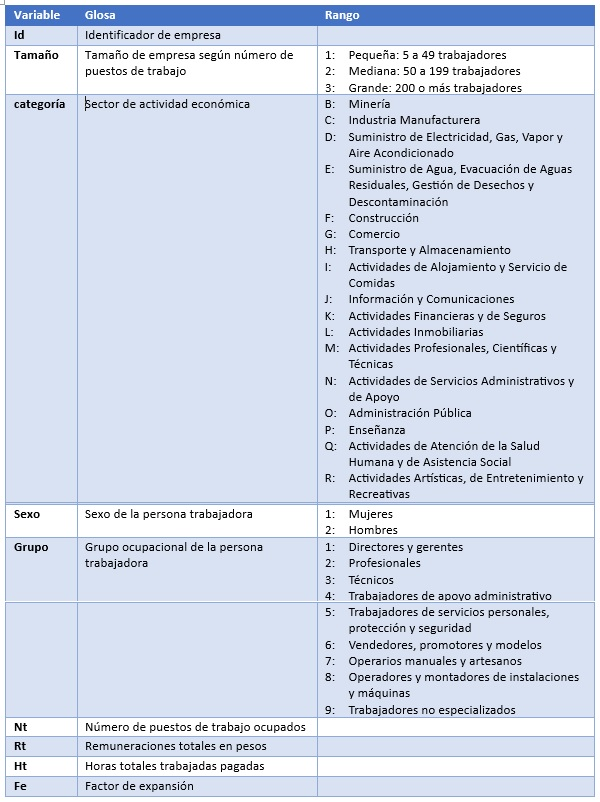


Los analistas del Subdepartamento Estadísticas de Remuneraciones deben procesar la información una vez recibida, realizando en primer lugar los siguientes requerimientos:
1.	Eliminar los registros que contengan datos nulos.
2.	Crear una variable “genero” que categorice la variable sexo.
3.	Crear una nueva variable llamada "nt_exp", "rt_exp" y "ht_exp" calculado a partir de la multiplicación de las variables y el factor de expansión "fe".
4.	Calcule el salario promedio mensual (SalarioMensual) por grupo ocupacional (grupo) y tamaño de empresas (tamaño).
5.	Realiza una visualización que muestre la relación entre el salario promedio mensual y el tamaño de empresas para cada grupo ocupacional.

Esto es solo una parte del proceso que deben realizar los analistas del subdepartamento.

Trabajaremos con un extracto de la base de datos, del mes de mayo del 2023.


In [ ]:
# Permisos para acceder al Driver

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Librerias

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Importamos los datos

df_mayo = pd.read_csv("/content/drive/MyDrive/mayo-2023.csv", delimiter=";")
df_mayo.head(5)

In [ ]:
# Buscamos informacion sobre el df

df_mayo.info()

Observamos que:

- La base tiene 11 variables (columnas) y 31626 registros (filas)
- No hay registros nulos
- La columna 'fe' no es int64() sino object(), por lo cual se debe cambiar

In [ ]:
# Cambiamos a 'float' la columna 'fe'

df_mayo['fe'] = df_mayo['fe'].str.replace(',', '.').astype(float)
df_mayo.head()

In [ ]:
# Agregamos la columna 'genero'

df_mayo['genero'] = df_mayo['sexo'].replace({1: 'mujer', 2: 'hombre'})
df_mayo.head()

In [ ]:
# Crear las columnas "nt_exp", "rt_exp" y "ht_exp"

df_mayo['nt_exp'] = (df_mayo['nt']*df_mayo['fe']).round(4)
df_mayo['rt_exp'] = (df_mayo['rt']*df_mayo['fe']).round(4)
df_mayo['ht_exp'] = (df_mayo['ht']*df_mayo['fe']).round(4)

df_mayo.head()

In [ ]:
# Calcule el salario promedio mensual (SalarioMensual) por grupo ocupacional (grupo) y tamaño de empresas (tamaño).

SalarioMensual = df_mayo.groupby(['grupo', 'tamano'])['rt'].mean().reset_index().rename(columns={'rt': 'SalarioMensual'})
SalarioMensual.set_index(['grupo', 'tamano'], inplace=True)

SalarioMensual

In [ ]:
# Realiza una visualización que muestre la relación entre el salario promedio mensual y el tamaño de empresas para cada grupo ocupacional

# Agrupar por grupo ocupacional y tamaño de empresa, y calcular el promedio del salario
promedio_salario_por_grupo_tamano = SalarioMensual.groupby(['grupo', 'tamano'])['SalarioMensual'].mean()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
promedio_salario_por_grupo_tamano.unstack().plot(kind='bar', ax=ax)
ax.set_xlabel('Grupos')
ax.set_ylabel('Salario Promedio Mensual')
ax.set_title('Relación entre Salario Promedio Mensual y Tamaño de Empresas por Grupos')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Esto es solo parte del trabajo que el grupo de analistas debe desarrollar como parte de limpieza y preparación de datos.

Cabe destacar que el Subdepartamento Estadísticas de Remuneraciones trabaja usando SQL Server y RStudio.

#<font color='blue'>**Caso de uso: Maurizio Frola**</font>
##***Mecanismos de detección temprana de Cancer de Piel en Hospital Regional de Aysén***

La región de Aysén es una región aislada geográficamente del resto del país, donde el Hospital Regional representa el punto de atención donde asisten todos los pacientes de la región con problemas de salud de mayor complejidad. Los costos de atención médica son altos debido al bajo volumen población y la disponibilidad de profesionales y equipos especializados es escaza en muchas áreas.

Pacientes de mayor complejidad son derivados a hospitales hacia otras regiones del país con centros de especialidad en el área. En este sentido hay una gran necesidad de atención temprana en patologías para evitar complicaciones serias a futuro de difícil acceso de diagnóstico y tratamiento en el territorio.

Con el objetivo de poder reconocer e identificar de forma temprana dichas patologías, se puede utilizar metodologías de procesamiento de imágenes y fotografías, tomadas en el hospital, pero procesadas por redes neuronales para detectar patologías que puedan escaparse a ojos no expertos en etapas tempranas de la enfermedad o casos fuera de la especialidad del (de la) médico tratante. Ayudando a un diagnóstico temprano y muy rápido con bajos costos de implementación y una alta efectividad.

Ya existen modelos altamente precisos de procesamiento de imagenes de patologías de cancer creados a partir de inteligencia artificial, entrenados con miles de casos en diferentes tipos de patologías cancerosas, por lo que la posibilidad de implementación es real y factible.

Para el caso de este caso de uso se planteará un acercamiento de pseudocódigo para dicho entrenamiento, específicamente aplicado a detección a Cancer de Piel. E utilizaremos HAM1000, una base de datos abierta de lesiones cutaneas con 10.000 imagenes de entrenamiento con 7 clases de lesiones de cancer de piel en la base de datos: Melanocytic nevi (nv), Melanoma (mel), Bening keratosis-like lesions (bkl), basal cell carcinoma (bcc), Actinic keratoses (akiec), Vascular Lesions (vas) y Dermatofibroma (df).

Por motivos de simplicidad de este ejercicio que se verá en módulos futuros se utilizará un pseudocódigo sin utilizar la base de datos.
Base:https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

In [ ]:
#1
import matplotlib.pyplot as plt #Para trabajar imagenes
import numpy as np #Para trabajar imagenes
import pandas as pd #Para trabajar imagenes
import os #
from glob import glob #Para trabajar con la estructura de las carpetas
import seaborn as sns #Para trabajar con "confusion_matrix" (Que nos permite calcular y trabajar la matriz entre los outputs predictivos y los reales)
from PIL import Image #Para cargar las imagenes porque permite también redimensionarlas en una linea

#1 Abriendo Imagenes
skin_df = pd.read_csv('data/HAM10000/HAM10000_metadata.csv') #Importamos la base de datos a pandas desde la base de datos HAM10000

image_path = {os.path.splitext(os.path.basename(x))[0]: x #Debido a que las imagenes se encuentran en 2 carpetas, decimos que busque primero en la primera carpeta, y luego en las siguientes carpetas todas la .jpg images
                     for x in glob(os.path.join('data/HAM10000/', '*', '*.jpg'))} #Con esto asignamos un "path" o recorrido de la carpeta a cada imagen

skin_df['path'] = skin_df['image_id'].map(image_path.get) #Añadimos el "Path" a nuestro data frame
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32)))) #Usamos "lambda funtion" para crear un for loop, que para cada x en el "path" creado, abra la imagen con una resolucón de 32x32 ("Para poder abrir la imagen usamos la PIL library")

print(skin_df['dx'].value_counts()) #Contamos el numero de imagenes para cada clase de lesión en la base de datos (los 7 tipos de lesiones)

#Es importante notar que si alguna de las clases tiene una frecuencia muy alta respecto a las otras, pueda terminar sesgando el entrenamiento, así que es posible balancear un poco antes de entrenar para tener mejor representatividad y precisión

n_samples = 5  # Sacamos 5 muestras para mostrar como figura

fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))#Creamos una matriz de subimagenes, m_axs es un 2D numpy array de subimagenes, crea 7 muestras para ser creadas horizontalmente
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df.sort_values(['dx']).groupby('dx')): #dx es la clase de las imágenes ya puesta en nuestro dataframe, groupby ordena las muestras en estas clases
    n_axs[0].set_title(type_name) #Ponemos el label a la subimagen
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()): #Iteramos para las n muestras
        c_ax.imshow(c_row['image']) #Ponemos las imagenes
        c_ax.axis('off') #Ocultamos los "axes" para cada subimagen de la matriz

#Este ejercicio también se puede hacer con pytorch para que no sea tan intensivo en RAM

In [ ]:
#2
np.random.seed(42) #Elegimos una semilla para randomizar
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical # Para convertir "labels" en "one-hot-encoding" (para representar datos categoricos numericamente)
from keras.models import Sequential #Para crear el modelo
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split #Para dividir nuestros datos entre datos de prueba y datos de entrenamiento
from scipy import stats #Para hacer stats básicos de los datos
from sklearn.preprocessing import LabelEncoder #Para transformar labels en valores númericos

#skin_df = pd.read_csv('data/HAM10000/HAM10000_metadata.csv') #Leemos la base de datos
#SIZE=32 #Definimos el tamaño de imagenes

#- Se distribuyen los datos a las 7 clases: {Melanocytic nevi (nv),
                                           Melanoma (mel),
                                           Bening keratosis-like lesions (bkl),
                                           basal cell carcinoma (bcc),
                                           Actinic keratoses (akiec),
                                           Vascular Lesions (vas),
                                           Dermatofibroma (df).}
#- Se balancean los datos, podemos asignar pesos a las clases según su frecuencia.
#- Leemos las imagenes basados en el ID desde el archivo CSV (así aseguramos que la imagen correcta es para el ID correcto)
#Definimos el "path" de la imagen en una nueva columna para su lectura como en el apartado anterior y la usamos para leer imagenes
#Convertimos el dataframe, de columna de imagenes en un array de numpy
#Dividimos los datos en "Entrenamiento" y "Testeo"
#Definimos el modelo (Buscamos la mejor herramienta para este tipo de problema)
#Entrenamos el modelo en múltiples "epoch" para entrenar y repetir
#Obtenemos datos de testeo y predicciones, las predicciones se convierten a "hot vectors" para crear la "Confusion Matrix"
#Buscamos las fracciones de errores de clasificación

***Una vez entrenado el modelo***


Podemos ya poner nuestras nuevas imagenes a ser reconocidas con una alta probabilidad de éxito sin la necesidad de un ojo experto para disernir el tipo de lesión. Pudiendo así determinar los casos con mayor probabilidad de peligrosidad y ser así derivado y atendido oportunamente.

Finalmente si la probabilidad de éxito de nuestro modelo iguala o supera el ojo de un especialista para a detección de lesiones dérmicas cancerosas, ya es posible realizar una fase de diagnóstico rápida, barata y temprana para posibles patologías. Siendo los solo casos con mayor probabilidad de presentar lesiones cancerosas llevados a consultar a un experto por tratamientos posteriores, esto permite no solo reducir costos económicos y logísticos. Sino que también para el caso de la Región de Aysén, representa una reducción significativa de las barrera geográfica para acceder a una buena calidad de tratamiento y diagnóstico de salud que se encuentra presente en otras partes del país con mejor acceso.

<font color='red'>__ATENCIÓN:__:<br>
Detección de tráfico en aplicación como por ejemplo Waze </font>

#<font color='blue'>**Caso de uso: Carol Díaz Lagos**</font>
##Detección de tráfico en aplicación como por ejemplo Waze
***


Los usuarios de las aplicaciones como Waze utilizan sus dispositivos móviles mientras conducen y la aplicación recopila información detallada y en tiempo real de ubicación, viaje, ruta, velocidad de viaje y otros detalles a través de las señales GPS en la aplicación instalada tales como aceleración y giroscopio del teléfono, detentando frenazos repentinos y/o accidentes.

Cuando un usuario ingresa su destino, Waze utiliza los datos en tiempo real y los algoritmos de enrutamiento para calcular la ruta más rápida y eficiente, evitando atascos y otros problemas de tráfico. Los usuarios también pueden interactuar proporcionando información como ubicación de accidente, bloqueos de caminos, policía, radares de velocidad, entre otros.

La aplicación también puede ofrecer rutas alternativas en tiempo real en caso de congestión o eventos inesperados.

En los servidores de Waze, los datos se procesan y analizan en tiempo real y se aplican algoritmos de procesamiento de señales y aprendizaje automático para identificar patrones de tráfico, como atascos, velocidades promedio y eventos de tráfico.

Los datos se verifican, comparan, agregan y se utilizan para generar un mapa en tiempo real de las condiciones del tráfico en una determinada área en tiempo real y almacenan (datos históricos) para hacer predicciones sobre las condiciones de tráfico en el futuro.

Dicho esto, adjunto ejemplos aplicables.


# 1.- Recopilación de Datos en Tiempo Real.




In [ ]:
import time
import random
import pandas as pd

# Función para simular la recopilación de datos de velocidad en tiempo real
def collect_real_time_data(minutes):
    data = {'Minuto': [], 'Velocidad': []}
    for minuto in range(1, minutes + 1):
        velocidad = random.randint(20, 60)
        data['Minuto'].append(minuto)
        data['Velocidad'].append(velocidad)
        print(f"Minuto {minuto}: Velocidad = {velocidad} km/h")
        time.sleep(1)  # Simula un intervalo de 1 segundo entre las lecturas de velocidad
    return pd.DataFrame(data)

# Función para detectar atascos de tráfico
def detect_traffic_jams(df, umbral_atascos):
    df['Velocidad Promedio'] = df['Velocidad'].rolling(window=1).mean()
    atascos = df[df['Velocidad Promedio'] < umbral_atascos]
    return atascos

# Parámetros
tiempo_simulacion_minutos = 10
umbral_atascos = 40  # Umbral para detectar atascos de tráfico (por ejemplo, 40 km/h)

# Simulación de recopilación de datos en tiempo real
datos_en_tiempo_real = collect_real_time_data(tiempo_simulacion_minutos)

# Detección de atascos de tráfico
atascos_detectados = detect_traffic_jams(datos_en_tiempo_real, umbral_atascos)

# Imprimir los resultados
if atascos_detectados.empty:
    print("No se detectaron atascos de tráfico.")
else:
    print("Atascos de tráfico detectados en los siguientes minutos:")
    print(atascos_detectados[['Minuto', 'Velocidad Promedio']])


# 2. Procesamiento de Datos en Tiempo Real.

In [ ]:
import time
import random
import pandas as pd
import numpy as np

# Función para simular la recopilación de datos de velocidad en tiempo real
def collect_real_time_data(minutes):
    data = {'Timestamp': [], 'Velocidad': []}
    for minuto in range(1, minutes + 1):
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
        velocidad = random.randint(20, 60)
        data['Timestamp'].append(timestamp)
        data['Velocidad'].append(velocidad)
        print(f"Tiempo: {timestamp}, Velocidad = {velocidad} km/h")
        time.sleep(1)  # Simula un intervalo de 1 segundo entre las lecturas de velocidad
    return pd.DataFrame(data)

# Función para detectar atascos de tráfico
def detect_traffic_jams(df, umbral_atascos):
    df['Velocidad Promedio'] = df['Velocidad'].rolling(window=5).mean()
    atascos = df[df['Velocidad Promedio'] < umbral_atascos]
    return atascos

# Parámetros
tiempo_simulacion_minutos = 10
umbral_atascos = 40  # Umbral para detectar atascos de tráfico (por ejemplo, 40 km/h)

# Simulación de recopilación de datos en tiempo real
datos_en_tiempo_real = collect_real_time_data(tiempo_simulacion_minutos)

# Detección de atascos de tráfico
atascos_detectados = detect_traffic_jams(datos_en_tiempo_real, umbral_atascos)

# Imprimir los resultados
if atascos_detectados.empty:
    print("No se detectaron atascos de tráfico.")
else:
    print("Atascos de tráfico detectados:")
    print(atascos_detectados)


# 3. Identificación de Patrones de Tráfico.

In [ ]:
import time
import random
import pandas as pd

# Función para simular la recopilación de datos de ubicación y velocidad en tiempo real
def collect_real_time_data(minutes):
    data = {'Timestamp': [], 'Latitud': [], 'Longitud': [], 'Velocidad': []}
    for minuto in range(1, minutes + 1):
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
        latitud = random.uniform(37.0, 38.0)  # Latitud en ejemplo ficticio
        longitud = random.uniform(-122.0, -121.0)  # Longitud en ejemplo ficticio
        velocidad = random.randint(20, 60)
        data['Timestamp'].append(timestamp)
        data['Latitud'].append(latitud)
        data['Longitud'].append(longitud)
        data['Velocidad'].append(velocidad)
        print(f"Tiempo: {timestamp}, Latitud: {latitud}, Longitud: {longitud}, Velocidad: {velocidad} km/h")
        time.sleep(1)  # Simula un intervalo de 1 segundo entre las lecturas
    return pd.DataFrame(data)

# Función para detectar patrones de tráfico (por ejemplo, atascos)
def identify_traffic_patterns(df, umbral_atascos):
    atascos = df[df['Velocidad'] < umbral_atascos]
    return atascos

# Parámetros
tiempo_simulacion_minutos = 10
umbral_atascos = 40  # Umbral para detectar atascos de tráfico (por ejemplo, 40 km/h)

# Simulación de recopilación de datos en tiempo real
datos_en_tiempo_real = collect_real_time_data(tiempo_simulacion_minutos)

# Identificación de patrones de tráfico
patrones_de_trafico = identify_traffic_patterns(datos_en_tiempo_real, umbral_atascos)

# Imprimir los resultados
if patrones_de_trafico.empty:
    print("No se detectaron patrones de tráfico (atascos).")
else:
    print("Patrones de tráfico (atascos) detectados:")
    print(patrones_de_trafico)


# 4. Generación de Mapas en Tiempo Real.

In [ ]:
import time
import random
import pandas as pd
import folium
import matplotlib.pyplot as plt

# Función para simular la recopilación de datos de ubicación y velocidad en tiempo real
def collect_real_time_data(minutes):
    data = {'Timestamp': [], 'Latitud': [], 'Longitud': [], 'Velocidad': []}
    for minuto in range(1, minutes + 1):
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
        latitud = random.uniform(37.0, 38.0)  # Latitud en ejemplo ficticio
        longitud = random.uniform(-122.0, -121.0)  # Longitud en ejemplo ficticio
        velocidad = random.randint(20, 60)
        data['Timestamp'].append(timestamp)
        data['Latitud'].append(latitud)
        data['Longitud'].append(longitud)
        data['Velocidad'].append(velocidad)
        print(f"Tiempo: {timestamp}, Latitud: {latitud}, Longitud: {longitud}, Velocidad: {velocidad} km/h")
        time.sleep(1)  # Simula un intervalo de 1 segundo entre las lecturas
    return pd.DataFrame(data)

# Parámetros
tiempo_simulacion_minutos = 10

# Simulación de recopilación de datos en tiempo real
datos_en_tiempo_real = collect_real_time_data(tiempo_simulacion_minutos)

# Crear un mapa interactivo con folium
m = folium.Map(location=[37.5, -121.5], zoom_start=10)  # Ubicación inicial ficticia

# Agregar marcadores de ubicación en el mapa
for index, row in datos_en_tiempo_real.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], popup=f"Velocidad: {row['Velocidad']} km/h").add_to(m)

# Guardar el mapa como un archivo HTML
m.save('mapa_de_trafico.html')

# Visualizar los datos de tráfico en un gráfico (por ejemplo, velocidad promedio)
plt.plot(datos_en_tiempo_real['Timestamp'], datos_en_tiempo_real['Velocidad'])
plt.xlabel('Tiempo')
plt.ylabel('Velocidad (km/h)')
plt.title('Velocidad de Tráfico en Tiempo Real')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# 5. Almacenamiento de Datos Históricos.

In [ ]:
import sqlite3
import random
import time

# Función para crear y conectar a una base de datos SQLite
def crear_conexion():
    conn = sqlite3.connect("datos_de_trafico.db")
    cursor = conn.cursor()
    return conn, cursor

# Función para crear una tabla si no existe
def crear_tabla(conn, cursor):
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS datos_trafico (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            timestamp TEXT,
            velocidad INTEGER
        )
    ''')
    conn.commit()

# Función para insertar datos históricos ficticios
def insertar_datos_historicos(conn, cursor):
    for _ in range(100):
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
        velocidad = random.randint(20, 60)
        cursor.execute("INSERT INTO datos_trafico (timestamp, velocidad) VALUES (?, ?)",
                       (timestamp, velocidad))
        conn.commit()

# Función para consultar datos históricos
def consultar_datos_historicos(cursor):
    cursor.execute("SELECT * FROM datos_trafico")
    return cursor.fetchall()

# Crear y conectar a la base de datos
conn, cursor = crear_conexion()

# Crear una tabla si no existe
crear_tabla(conn, cursor)

# Insertar datos históricos ficticios
insertar_datos_historicos(conn, cursor)

# Consultar y mostrar datos históricos
datos_historicos = consultar_datos_historicos(cursor)
for fila in datos_historicos:
    print(f"ID: {fila[0]}, Timestamp: {fila[1]}, Velocidad: {fila[2]} km/h")

# Cerrar la conexión a la base de datos
conn.close()




---



#<font color='blue'>**Caso de uso Jorge Hueichan**</font>
<br>
<img src="https://datos.gob.cl/uploads/group/2017-08-17-192521.224172LOGO-CALBUCO.jpg" alt="Logo of Municipalidad de Calbuco" width="200" height="100">

La municipalidad de Calbuco, requiere inspeccionar, realizar limpieza, formateo y análizar los datos de los permisos de circulación del año 2023, para esto de cuenta con el set de datos en formato archivo csv en un repositorio de github. Los requerimientos específicos estan dados en los puntos I, II, III y IV:

<table border="1">
<thead>
<tr><th>Campos</th></tr>
</thead>
<tbody>
<tr><td>Grupo Vehiculo</td></tr>
<tr><td>Placa</td></tr>
<tr><td>digito</td></tr>
<tr><td>Codigo SII</td></tr>
<tr><td>Año Vehículo</td></tr>
<tr><td>Tasacion</td></tr>
<tr><td>Tipo de Pago</td></tr>
<tr><td>Valor_Neto</td></tr>
<tr><td>Valor_IPC</td></tr>
<tr><td>Valor_Multa</td></tr>
<tr><td>Valor Pagado</td></tr>
<tr><td>Forma Pago</td></tr>
<tr><td>Fecha_Pago</td></tr>
<tr><td>Año Permiso</td></tr>
<tr><td>Tipo Vehiculo</td></tr>
<tr><td>Marca</td></tr>
<tr><td>Modelo</td></tr>
<tr><td>Color</td></tr>
<tr><td>Transmisión</td></tr>
<tr><td>Tipo Combustible</td></tr>
<tr><td>Cilindrada</td></tr>
<tr><td>Equipamiento</td></tr>
<tr><td>Numero Puertas</td></tr>
</tbody>
</table>


# Nueva sección

In [ ]:
#importación de las liberías a utilizar:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Lectura de los datos desde git y creación del Dataframe:
url='https://github.com/pentahogmail123/lic/files/12754460/permiso-de-circulacion-2023.csv'
df_movil=pd.read_csv(url, encoding = "ISO-8859-1",sep=';')

**I.- Inspección del DataSet**

Se requiere:



1.   Impresión de la Cantidad de Filas y columnas
2.   Impresión de Nombre columnas
3.   Información del DataSet Columnas, nulos y tipo de datos
4.   Datos estadísticos



In [ ]:
print('1.- Impresión de la Cantidad de Filas y columnas:')
print('Cantidad de Filas y columnas:', df_movil.shape)
print()
print('2.- Impresión de Nombre columnas:')
print('Nombre columnas:',df_movil.columns)
print()
print('3.-Información del DataSet Columnas, nulos y tipo de datos:')
print('En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos.\n')
print('descripción estadística de los datos numéricos')
df_movil.info()
print('Datos estadísticos:')
print()
df_movil.describe()



**II.- Limpieza de los datos**

Se requiere :  



1.   Verificar datos duplicados, en el caso de haber, deben ser removidos.  
2. El número de placa o patente, al ser un dato clave del dataset por lo tanto no pueden haber nulos.
3. Eliminar filas vacías.

In [ ]:
duplicates = df_movil[df_movil.duplicated(keep=False)]
print(f'1.a.- Datos duplicados antes de eliminación: {duplicates} \n')
#Se puede verficar que en este set de datos existe una fila duplicada, se ejecuta el comando para eliminar los duplicados
df_movil.drop_duplicates(inplace=True)
duplicates = df_movil[df_movil.duplicated(keep=False)]
print(f'1.b.- Datos duplicados post eliminación: {duplicates}  \n')
#Verificación de 'Placa' con valor nulo
valores_nulos = df_movil['Placa'].isnull().sum()
print(f'2.- Existen {valores_nulos} valores nulos en el conjunto de datos \n')
#Eliminar filas vacías.
df_movil.dropna(how='all',inplace=True)


**III.-  Formateo de los datos**

Se requiere :
  
  1. Convertir las 'Fecha_Pago' a tipo datetime
  2. Convertir todas las series con valores de cadena a mayúsculas.
  3. Convertir el nombre de las columnas a mayúsculas y reeemplazar los espacios por guión bajo '_'.



In [ ]:
#1.- Conversión de las 'Fecha_Pago' a tipo datetime:
df_movil['Fecha_Pago'] = pd.to_datetime(df_movil['Fecha_Pago'],format='%d/%m/%Y')

#2.- Convertir todas las series con valores de cadena a mayúsculas.
df_movil = df_movil.applymap(lambda x: x.upper() if isinstance(x, str) else x)

#3.- Convertir el nombre de las columas a mayúsculas y reeemplazar los espacios por guión bajo '_'
df_movil.columns=df_movil.columns.str.upper().str.replace(' ', '_')

In [ ]:
print(df_movil)

**IV.- Análisis**

Se requiere:

1. Graficar una matriz de correlación (método de pearson)
2. Mostrar Porcentaje x Tipo Vehiculo
3. Mostrar Valor Multa x tipo de vehiculo
4. Tipo de Pago x  Fecha_Pago




En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos podría ser una buena decisión eliminar caracteristicas que tuvieran alta correlación

In [ ]:
#1. matriz de correlación
corr_df = df_movil.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
#Mostrar Cantidad x Tipo Vehiculo
conteo_por_grupo = df_movil.groupby('GRUPO_VEHICULO').size()
df_conteo = pd.DataFrame({'GRUPO_VEHICULO': conteo_por_grupo.index, 'CANTIDAD': conteo_por_grupo.values})

# Crear el gráfico de pie
plt.figure(figsize=(4, 4))
plt.pie(df_conteo['CANTIDAD'], labels=df_conteo['GRUPO_VEHICULO'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Tipo de Vehículo')
plt.axis('equal')
# Mostrar el gráfico
plt.show()

In [ ]:
#Mostrar Cantidad x Tipo Vehiculo
conteo_por_grupo = df_movil.groupby('GRUPO_VEHICULO')['VALOR_MULTA'].sum()
df_conteo = pd.DataFrame({'GRUPO_VEHICULO': conteo_por_grupo.index, 'VALOR_MULTA': conteo_por_grupo.values})

#Crear el gráfico de pie
plt.figure(figsize=(4, 4))
plt.pie(df_conteo['VALOR_MULTA'], labels=df_conteo['GRUPO_VEHICULO'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Multas x Tipo de Vehículo ')
plt.axis('equal')
# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=df_movil

# Filtrar el DataFrame por tipo de pago (Internet y Presencial)
df_internet = df[df['TIPO_DE_PAGO'] == 'INTERNET']
df_presencial = df[df['TIPO_DE_PAGO'] == 'PRESENCIAL']

# Contar la cantidad de pagos por fecha para cada tipo de pago
conteo_internet = df_internet.groupby('FECHA_PAGO').size().reset_index(name='INTERNET')
conteo_presencial = df_presencial.groupby('FECHA_PAGO').size().reset_index(name='PRESENCIAL')

# Combinar los DataFrames para tener todos los datos en uno
df_combinado = conteo_internet.merge(conteo_presencial, on='FECHA_PAGO', how='outer').fillna(0)

# Ordenar el DataFrame por la fecha
df_combinado = df_combinado.sort_values(by='FECHA_PAGO')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_combinado['FECHA_PAGO'], df_combinado['INTERNET'], label='INTERNET')
plt.bar(df_combinado['FECHA_PAGO'], df_combinado['PRESENCIAL'], bottom=df_combinado['INTERNET'], label='PRESENCIAL')
plt.xlabel('Fecha de Pago')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipo de Pago (Internet y Presencial) por Fecha de Pago')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Se concluye que los pagos presenciales son mas frecuentes entre los meses marzo y abril. Mientras que los pagos por  Internet son realizados principalmente entre mayo y junio.

<font color='red'> **FIN CASOS DE USO ANTERIOR**<br>
</font>

**Caso de Uso: análisis del diseño de sitios web**  

**Introducción**:  

Una empresa de comercio electrónico ha rediseñado recientemente su sitio web (Diseño A) y quiere evaluar su impacto en las tasas de conversión de los usuarios en comparación con el diseño anterior (Diseño B). La empresa ha recopilado datos sobre las interacciones de los usuarios para ambos diseños.

**Objetivo**:

Analice las tasas de conversión para el Diseño A y el Diseño B.
Calcule y visualice los intervalos de confianza para las tasas de conversión.
Realice una prueba de hipótesis para determinar si existe una diferencia significativa en las tasas de conversión.
Visualice los datos y pruebe los resultados utilizando Python.


Estadísticas descriptivas:

Calcule las tasas de conversión para ambos diseños.
Exploración visual:

Cree gráficos de barras para visualizar las tasas de conversión de ambos diseños.
Cree histogramas para visualizar la distribución de los datos de conversión para ambos diseños.
Intervalos de confianza:

Calcule y visualice los intervalos de confianza del 95% para las tasas de conversión.
Evaluación de la hipótesis:

Formule la hipótesis nula ($H_0$) e hipótesis alternativa ($H_1$).
Realice una prueba z de proporciones para comparar las tasas de conversión.
Determine el valor p y tome una decisión con respecto a la hipótesis nula.
Conclusión:

In [10]:
#Imporatación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import NormalIndPower
from scipy.stats import ttest_ind
from scipy.stats import norm


In [11]:
#Dataset
# Conversion data for Design A and Design B (0: No conversion, 1: Conversion)
conversion_design_a = np.array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])
conversion_design_b = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0])


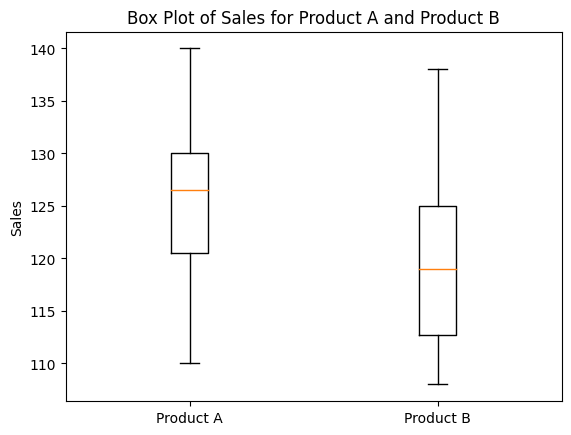

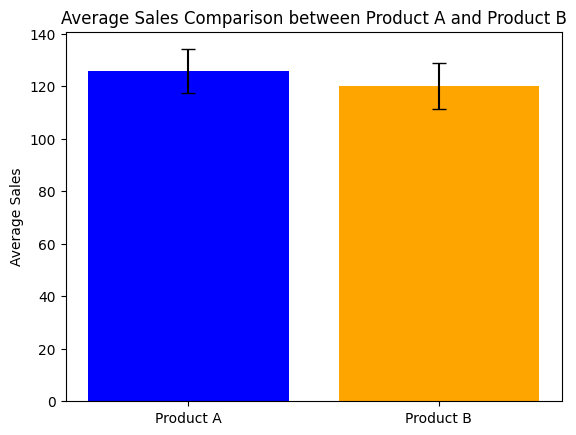

Fail to reject the null hypothesis. No significant difference in average sales.


In [14]:
# Sales data for Product A and Product B
sales_product_a = np.array([120, 130, 110, 140, 125, 135, 130, 128, 118, 122])
sales_product_b = np.array([115, 112, 120, 108, 118, 122, 112, 130, 138, 126])

# 1. Descriptive Statistics
mean_a, std_a = np.mean(sales_product_a), np.std(sales_product_a)
mean_b, std_b = np.mean(sales_product_b), np.std(sales_product_b)

# 2. Visual Exploration
plt.boxplot([sales_product_a, sales_product_b], labels=['Product A', 'Product B'])
plt.title('Box Plot of Sales for Product A and Product B')
plt.ylabel('Sales')
plt.show()

# 3. Hypothesis Testing
# Null hypothesis: There is no significant difference in the average sales between Product A and Product B.
# Alternative hypothesis: There is a significant difference in the average sales.

t_statistic, p_value = ttest_ind(sales_product_a, sales_product_b)
alpha = 0.05

# 4. Visualization
plt.bar(['Product A', 'Product B'], [mean_a, mean_b], yerr=[std_a, std_b], capsize=5, color=['blue', 'orange'])
plt.title('Average Sales Comparison between Product A and Product B')
plt.ylabel('Average Sales')
plt.show()

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average sales.")
else:
    print("Fail to reject the null hypothesis. No significant difference in average sales.")
